# KNN Algorithm
It is a Lazy Learning Method i.e to make a prediction it uses dataset to produce a result without any training phase.

**Prediction**

KNN uses entire dataset for prediction.
We have one observation X and we want to predict Y which is unknown
To predict, algorithm will look for the K neighbors of the dataset closest to our observation (X),
then for these K neighbors, it uses their output in order to calculate the variable Y.

KNN regression: The Median of the Y variables of K neighbors used to predict Y of X.
    
KNN Classification: The Mode (the value that appears most often) of the Y variables of K neighbors used to predict Y of X

**Understand the Algorithm**

* Input data:
    * A data set D.
    * A distance definition function d.
    * An integer K.

**Steps:**
    
 For a new observation X for which we want to predict output variable Y
1.	Calculate all the distance of X with other observations of D.
2.	Retain some random K observation from That are close to X using distance Function d.
3.	Take the values of Y from retained K observation and do:
•	For Regression calculate median of Y 
•	For Classification calculate mode of Y
4.	Return the value predicted above as Y for observation X

**Similarity calculation in KNN algorithm**

 As we know to calculate the distance between two observation KNN need a function. The closer two points are to each other, the more similar they are and vice versa.
We choose d according to types of data we are handling 

Euclidean distance for quantitative data (Weight,wages,size)

Taxicab geometry is use when data are not of the same type (age,sex,length)

**How to choose the value of K**

Hit and trial with multiple values of K then choose the value that reduce number of errors and predict with precision when receives new data.
For smaller K (fewer neighbor we use), the more subject to underfitting the model

For larger K(more neighbor we use),the more reliable our prediction will be 

For K = N(Total number of observation) it will lead to overfitting the model

In below diagram N-NN classifier use all observation and do overfitting
And for 5-NN classifier the boundaries between each region are fairly smooth and regular, it generalizes better than its opponent.
 

**Limitations ok KNN**

It is a simple algorithm because it doesn’t need a model to make a prediction. 
And to do so it keep all the observation of dataset into memory thus reducing the size of input dataset.

Also we need to try several combination of K and d and tune the algorithm to get satisfactory result.


In [ ]:
from pyforest import *

In [17]:
import mglearn
from IPython.display import display

C:\Users\JeevneshNandwana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

X.shape: (26, 2)


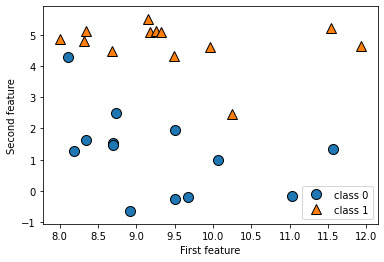

In [35]:
#generate classification dataset
X,y = mglearn.datasets.make_forge()
#plot dataset
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0","class 1"])
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Target')

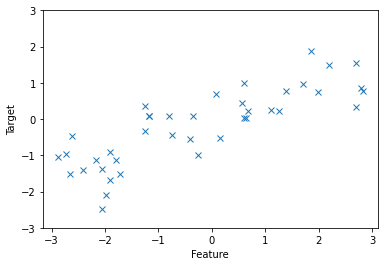

In [36]:
# generate regression dataset
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'x')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [37]:
# Real world classification dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [38]:
print("shape of cancer data: {}".format(cancer.data.shape))

shape of cancer data: (569, 30)


In [39]:
print("sample counts per class: \n{}".format(
    {n:v for n, v in zip(cancer.target_names,np.bincount(cancer['target']))}))

<IPython.core.display.Javascript object>

sample counts per class: 
{'malignant': 212, 'benign': 357}


In [40]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [41]:
# Real world regression dataset
from sklearn.datasets import load_boston
boston = load_boston()
print("Data.shape: \n{}".format(boston.data.shape))

Data.shape: 
(506, 13)


In [42]:
# Feature Engineering
X,y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))

X.shape: (506, 104)
y.shape: (506,)


C:\Users\JeevneshNandwana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


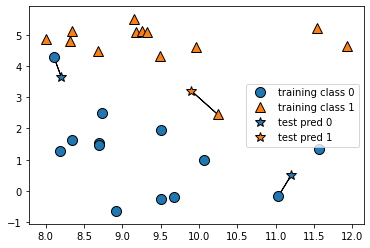

In [43]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\JeevneshNandwana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


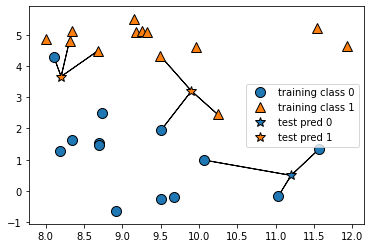

In [44]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

**KNN Classificaton**

In [45]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

C:\Users\JeevneshNandwana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [48]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
#Making predictions on test set
print("Test set Predictions:{}".format(clf.predict(X_test)))

Test set Predictions:[1 0 1 0 1 0 0]


In [50]:
#Test Accuracy
print("Test set accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy: 0.86


<IPython.core.display.Javascript object>

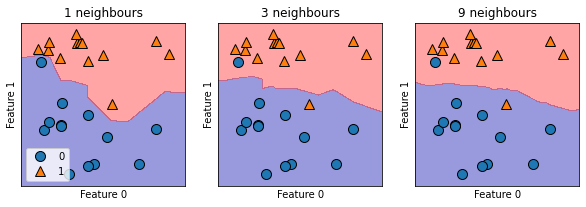

In [51]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbours, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbours)
    clf.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbours".format(n_neighbours))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

Real World data KNN classification

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

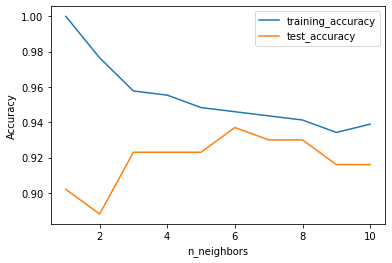

In [53]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

#try n neighbours from 1 to 10
neighbors_settings = range(1,11)
for n_neighbours in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbours)
    clf.fit(X_train,y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training_accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

**k-neighbors regression**

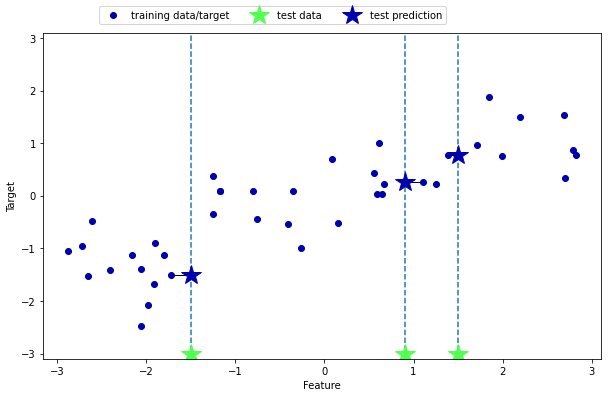

In [55]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

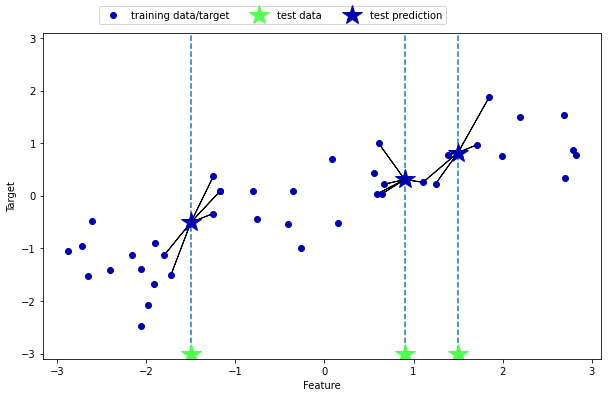

In [57]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

In [58]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

#splitting the wave data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#instantiate the model and set the number of neighbours to 3
reg = KNeighborsRegressor(n_neighbors=3)

#fit the model using the training data and training model
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [59]:
#making prediction on test data
print("Test set predictions: \n{}".format(reg.predict(X_test)))

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [60]:
# The R^2 score, also known as the coefficient of determination, is a meas‐
# ure of goodness of a prediction for a regression model, and yields a score between 0
# and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds
# to a constant model that just predicts the mean of the training set responses, y_train
#evaluate the model
print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.83


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

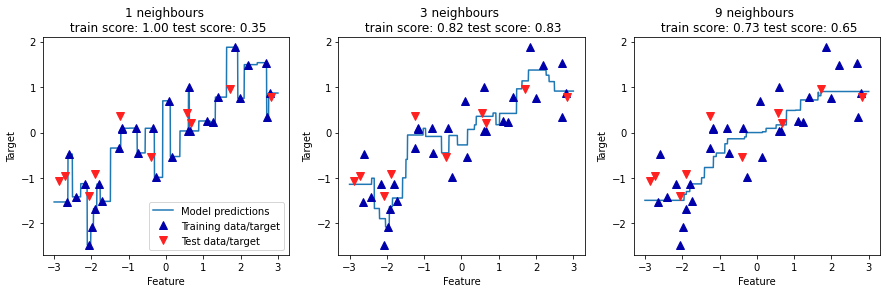

In [61]:
fig, axes = plt.subplots(1,3,figsize = (15,4))
# creating 1000 data points evenly spaced between -3 and 3

line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbours, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbours)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize = 8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize = 8)
    ax.set_title("{} neighbours \n train score: {:.2f} test score: {:.2f}".format
                 (n_neighbours,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")


In [ ]:
# In above diagram more neighbors leads to smooth diagram and less neighbors is passes throgh
# every data point which makes is overfit 

**Dataset from Kaggle**

In [4]:
diabetes = pd.read_csv("diabetes.csv")

<IPython.core.display.Javascript object>

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print("shape of the diabetes data: {}".format(diabetes.shape))

shape of the diabetes data: (768, 9)


In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
X = diabetes.drop("Outcome",axis=1)
y = diabetes["Outcome"]

In [10]:
X.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [13]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<IPython.core.display.Javascript object>

In [15]:
print("Train data shape: {}".format(X_train.shape))

Train data shape: (537, 8)


In [16]:
print("Test data shape: {}".format(X_test.shape))

Test data shape: (231, 8)


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='BMI', ylabel='Age'>

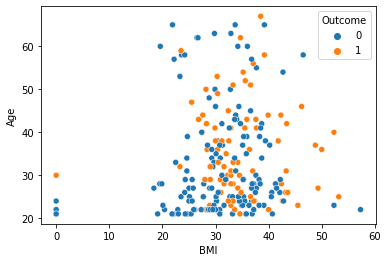

In [20]:
sns.scatterplot(x = "BMI" , y = "Age" , hue = "Outcome" , data = X_test.join(y_test, how = "outer"))

<IPython.core.display.Javascript object>

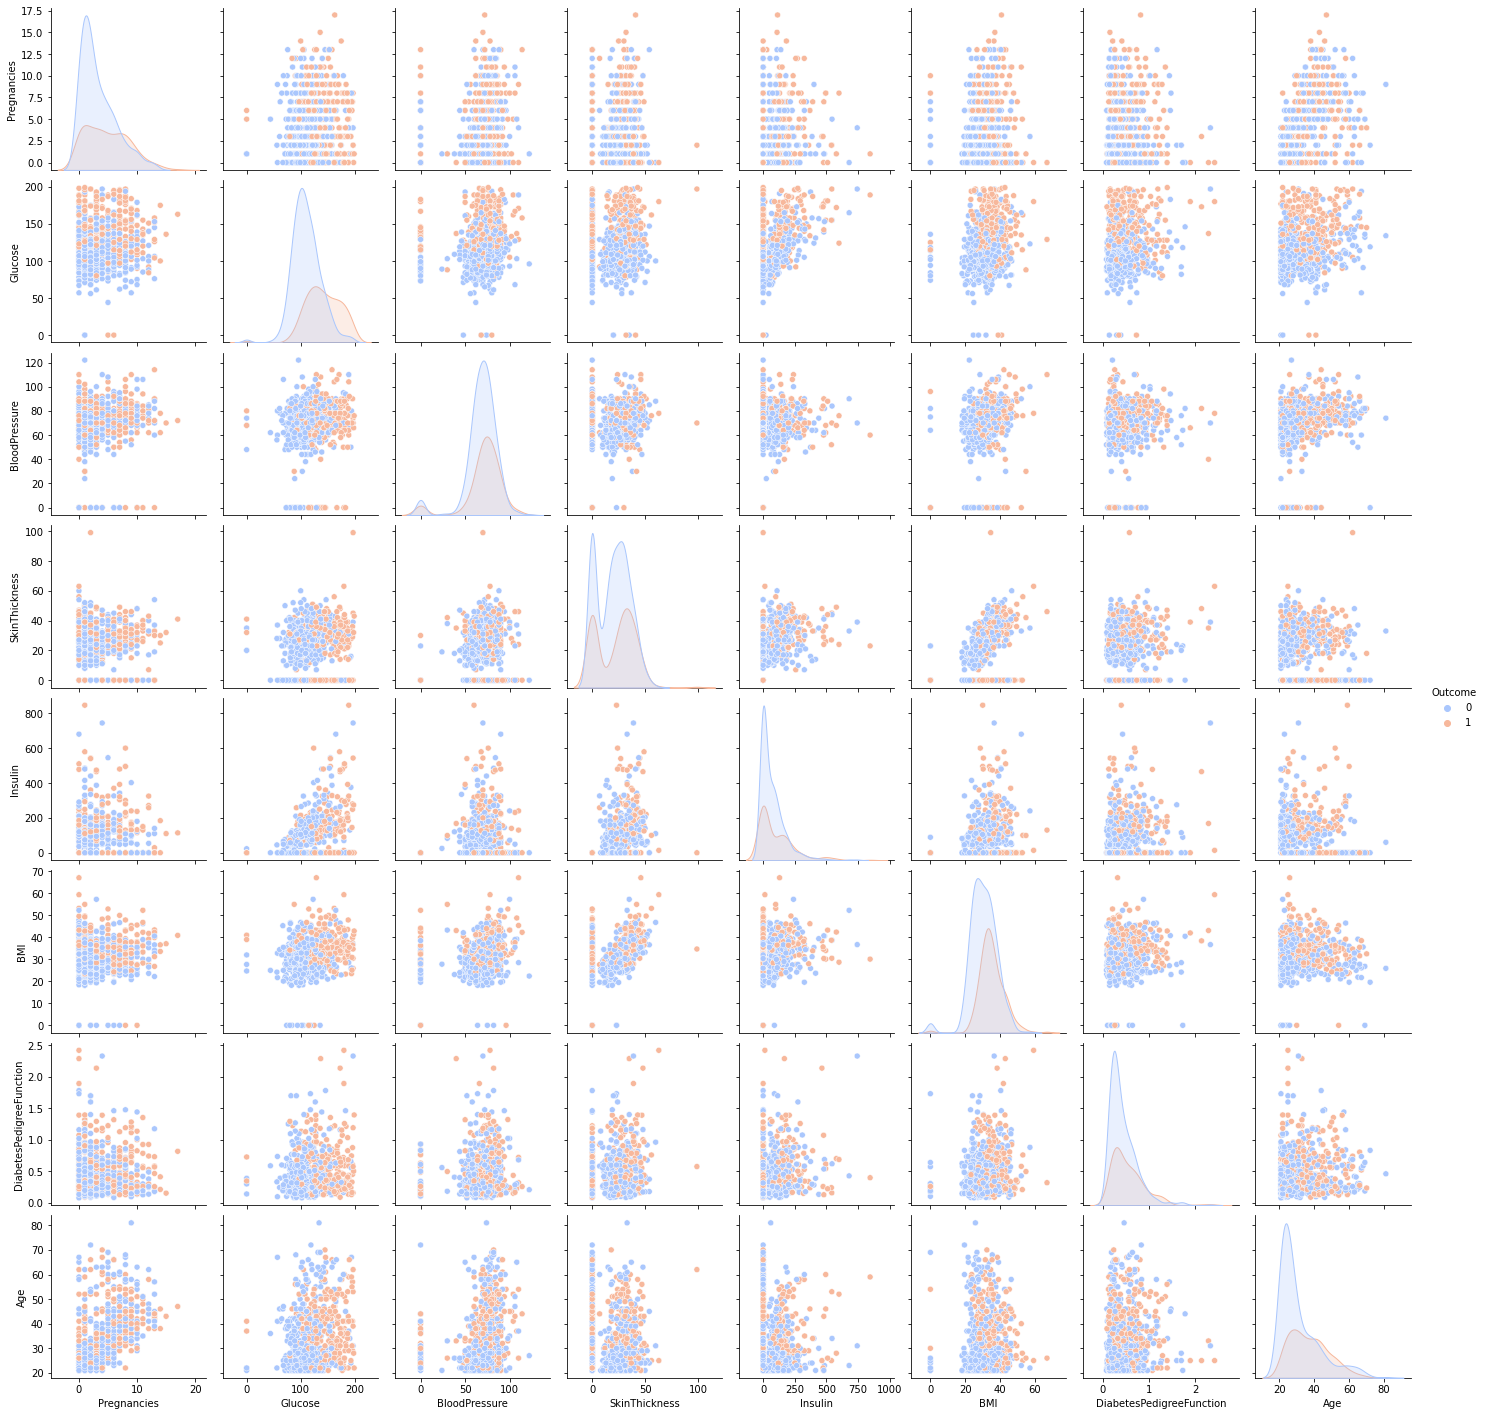

In [21]:
sns.pairplot(diabetes,hue='Outcome',palette='coolwarm')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

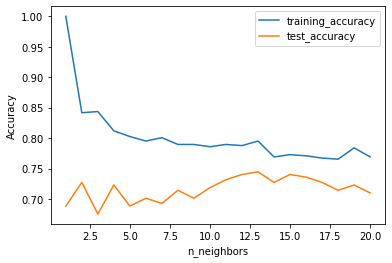

In [32]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

#try n neighbours from 1 to 10
neighbors_settings = range(1,21)
for n_neigbours in neighbors_settings:
    #building the model
    clf = KNeighborsClassifier(n_neighbors = n_neigbours,metric='minkowski')
    clf.fit(X_train,y_train)
    #Record trainig set accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    #Record test set accuracy
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training_accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [27]:
sklearn.neighbors.VALID_METRICS['brute']

<IPython.core.display.Javascript object>

['cityblock',
 'cosine',
 'euclidean',
 'haversine',
 'l2',
 'l1',
 'manhattan',
 'precomputed',
 'nan_euclidean',
 'braycurtis',
 'canberra',
 'chebyshev',
 'correlation',
 'cosine',
 'dice',
 'hamming',
 'jaccard',
 'kulsinski',
 'mahalanobis',
 'matching',
 'minkowski',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule',
 'wminkowski']